Author: Samantha Butler

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
from collections import defaultdict
from heapq import nlargest 
%matplotlib inline

In [2]:
#  Main code starts here
#  Location and loading Face Cascade XML
OPENCV_PATH = "/usr/local/lib/python3.6/dist-packages/cv2/data"
faceXML = os.path.join(OPENCV_PATH,'haarcascade_frontalface_default.xml')
faceCascade = cv2.CascadeClassifier(faceXML)

baseDir = "/home/CV/FaceData"
folderList = ['A','B','C','D','E']
folderPathList = [os.path.join(baseDir,folder) for folder in folderList]

In [3]:
def process_images_from_directory(faceCascade, directory, scaleFactor=1.1, minNeighbors=4):
    imageDictionary = dict() 
    for directoryPath, directoryNames, fileNames in os.walk(directory):
        for fileName in fileNames:
            imageFile = os.path.join(directoryPath, fileName) 
            # Reads image into RGB for histogram comparison
            img = cv2.imread(imageFile)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# quicker processing speeds in gray
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            faces = faceCascade.detectMultiScale(img_gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
            imageDictionary[fileName] = (img_gray, img_rgb, faces)  
    return imageDictionary

def process_image_from_list(faceCascade, image_list, scaleFactor=1.1, minNeighbors=8, minSize=(40,40), maxSize=(400,400)):
    imageList = list()
    for imageFile in image_list:
        # Reads image into RGB for histogram comparison
        img = cv2.imread(imageFile)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = faceCascade.detectMultiScale(img_gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
        imageList.append((imageFile, img_gray, img_rgb, faces))
    #print(imageList)
    return imageList

In [4]:
# this runs face detection with the settings across all images in double dictionary
# imageDictionary = {folderName: { img.jpg: (imgRGB_array)...}}
imageDictionary = {folderName : process_images_from_directory(faceCascade, os.path.join(baseDir,folderName)) for folderName in folderList}
obamaDictionary = {folderName : process_images_from_directory(faceCascade, os.path.join(baseDir,folderName)) for folderName in ['ObamaTemplate']}
# print(obamaDictionary['ObamaTemplate']['ObamaTemplate0.jpg'])

In [5]:
# Draw rectangles of all faces in double dictionary, this will change images

def drawRectanglesAroundFaces(folderList, imageDictionary):
    for index, folderName in enumerate(folderList):
        for imageName in imageDictionary[folderName]:
            # Stored in double dictionary is the tuple of (imageData, FaceData)
            # faceData is a list of all faces found : x,y coordinate with w,h being width and height
            imageData = imageDictionary[folderName][imageName][1]
            faceData = imageDictionary[folderName][imageName][2]
            for (x,y,w,h) in faceData:        
                cv2.rectangle(imageData,(x,y),(x+w,y+h),(255,0,0),2) #plotting on Color images
                
# this plots one directory 
def plotBoxedFacesPerDirectory(folderName, imageDictionary):
    plt.figure(figsize=(20,100))
    for index, imageName in enumerate(imageDictionary[folderName]):
        imageData = imageDictionary[folderName][imageName][1]
        plt.subplot(30,8,index+1)
        plt.imshow(imageData)
        plt.title(imageName)
        
# plotBoxedFacesPerDirectory('A', imageDictionary)
# plotBoxedFacesPerDirectory('B', imageDictionary)
# plotBoxedFacesPerDirectory('C', imageDictionary)
# plotBoxedFacesPerDirectory('D', imageDictionary)

# drawRectanglesAroundFaces(folderList, imageDictionary)

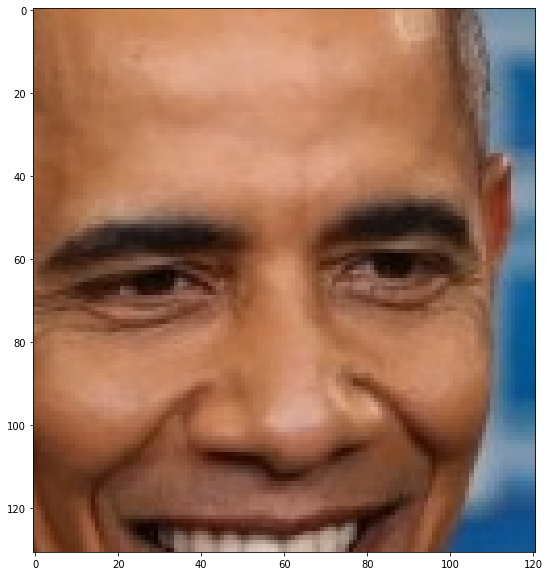

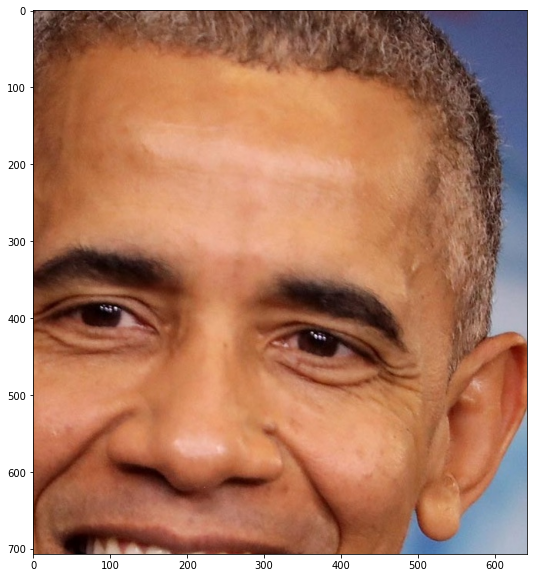

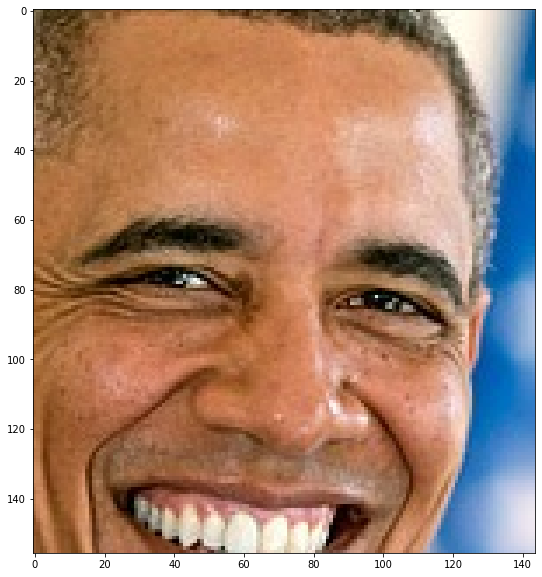

(131, 121, 3) (707, 642, 3) (156, 144, 3)


In [6]:
# Plot original captured obama face templates
gray_obama_image, rgb_obama_image, obama_face = obamaDictionary['ObamaTemplate']['ObamaTemplate0.jpg']
y, x, h, w = obama_face[0]
obama_face_template0 = rgb_obama_image[y:y+h,x:x+w]
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(1,1,1)
ax.imshow(obama_face_template0)
plt.show()

gray_obama_image, rgb_obama_image, obama_face = obamaDictionary['ObamaTemplate']['ObamaTemplate1.jpg']
y, x, h, w = obama_face[0]
obama_face_template1 = rgb_obama_image[y:y+h,x:x+w]
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(1,1,1)
ax.imshow(obama_face_template1)
plt.show()

gray_obama_image, rgb_obama_image, obama_face = obamaDictionary['ObamaTemplate']['ObamaTemplate2.jpg']
y, x, h, w = obama_face[0]
obama_face_template2 = rgb_obama_image[y:y+h,x:x+w]
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(1,1,1)
ax.imshow(obama_face_template2)
plt.show()

obama_face_templates = [('Template0',obama_face_template0), ('Template1',obama_face_template1), ('Template2',obama_face_template2)]
print(obama_face_template0.shape, obama_face_template1.shape, obama_face_template2.shape)

In [7]:
# ''' Modified template faces to test entire colored face to get more hollistic results.
# !!!! WHEN RUNNING THESE TEMPLATES THROUGH MY ALGORITHM I ACTUALLY GOT WORSE TEMPLATE MATCHING SCORES
#  ACROSS THE BOARD!!! SCORES CAN BE SEEN BELOW IMAGES '''

# obama_face_templates = []
# gray_obama_image, rgb_obama_image, obama_face = obamaDictionary['ObamaTemplate']['ObamaTemplate0.jpg']
# y, x, h, w = obama_face[0]
# obama_face_template0 = rgb_obama_image[y-55:y+h+55,x-50:x+w-15]
# fig = plt.figure(figsize = (10,10))

# ax = fig.add_subplot(1,1,1)
# ax.imshow(obama_face_template0)
# plt.show()

# gray_obama_image, rgb_obama_image, obama_face = obamaDictionary['ObamaTemplate']['ObamaTemplate1.jpg']
# y, x, h, w = obama_face[0]
# obama_face_template1 = rgb_obama_image[y-90:y+h+250,x-200:x+w]
# fig = plt.figure(figsize = (10,10))

# ax = fig.add_subplot(1,1,1)
# ax.imshow(obama_face_template1)
# plt.show()

# gray_obama_image, rgb_obama_image, obama_face = obamaDictionary['ObamaTemplate']['ObamaTemplate2.jpg']
# y, x, h, w = obama_face[0]
# obama_face_template2 = rgb_obama_image[y-20:y+h+55,x-45:x+w-25]
# fig = plt.figure(figsize = (10,10))

# ax = fig.add_subplot(1,1,1)
# ax.imshow(obama_face_template2)
# plt.show()
    
# obama_face_templates = [('Template0',obama_face_template0), ('Template1',obama_face_template1), ('Template2',obama_face_template2)]

In [8]:
# Function to store and display all 6 match template scores. This function invokes automatic scaling so that both template and
# image are scaled to whicever image is smaller

def getMatchTemplateScores1(imageDictionary, templates):
    results = []
    nonEmptyTestFaces = []
#     print('%5s  %10s  %12s  %8s  %11s  %11s  %11s  %11s  %11s' % ('folder','template','test_img','CORR_NORM', 'SQDIFF_NORM', 'COEFF_NORM', 'CORR', 'SQDIFF', 'COEFF'))
    for folder in imageDictionary:
        for test_file in imageDictionary[folder]:
            test_gray, test_rgb, test_faces = imageDictionary[folder][test_file]
            
            for (y,x,h,w) in list(test_faces):
                face_to_identify = test_rgb[y:y+h,x:x+w]
                
                for template in templates: 
                    scale_size = correctScale(template[1], face_to_identify)
#                     print(scale_size, face_to_identify)
                    if not face_to_identify.any():
                        continue
                    resized_obama_face=cv2.resize(template[1],scale_size, interpolation = cv2.INTER_AREA)
                    resized_test_face= cv2.resize(face_to_identify,scale_size, interpolation = cv2.INTER_AREA)

                    corrNormScore = cv2.matchTemplate(resized_obama_face, resized_test_face, cv2.TM_CCORR_NORMED) 
                    sqDiffNormScore = cv2.matchTemplate(resized_obama_face, resized_test_face, cv2.TM_SQDIFF_NORMED) 
                    ccoeffNormScore = cv2.matchTemplate(resized_obama_face, resized_test_face, cv2.TM_CCOEFF_NORMED)
                    corrScore = cv2.matchTemplate(resized_obama_face, resized_test_face, cv2.TM_CCORR) 
                    sqDiffScore = cv2.matchTemplate(resized_obama_face, resized_test_face, cv2.TM_SQDIFF) 
                    ccoeffScore = cv2.matchTemplate(resized_obama_face, resized_test_face, cv2.TM_CCOEFF) 

    #                 print(folder, test_file, scores0[0][0], scores1[0][0])
                    print('%5s  %10s  %15s  %8s  %11s  %11s  %11s  %11s  %11s' % (folder,template[0], test_file, round(corrNormScore[0][0],3), round(sqDiffNormScore[0][0],3), round(ccoeffNormScore[0][0],3), round(corrScore[0][0],3),  round(sqDiffScore[0][0],3),  round(ccoeffScore[0][0],3)),  end='\n')
                    results.append((folder,test_file,round(corrNormScore[0][0],3), round(sqDiffNormScore[0][0],3), round(ccoeffNormScore[0][0],3)))
    return results

# Function to determine whether the template or the test image shape is larger or smaller. Want to return smaller image to shrink larger image down rather than smaller 
# image up to prevent less data loss 
def correctScale(templateImg, testImg):
    if (templateImg.shape[0] == 0 or templateImg.shape[1] == 0 or testImg.shape[0] == 0 or testImg.shape[1] == 0):
        scale = (331,302)
    elif (templateImg.shape > testImg.shape):
        scale = (testImg.shape[0], testImg.shape[1])
    elif (templateImg.shape < testImg.shape): 
         scale = (templateImg.shape[0], templateImg.shape[1])
    else:
        scale = scale = (331,302)
    return scale

In [9]:
# Compare Obama templates with itself to then determine threshold scores
print('%5s  %18s  %12s  %14s  %11s  %11s  %8s  %11s  %11s' % ('Folder','Template','Test Image','CORR_NORM', 'SQDIFF_NORM', 'COEFF_NORM', 'CORR', 'SQDIFF', 'COEFF'))
results = getMatchTemplateScores1(obamaDictionary, obama_face_templates) 
# print(results)

Folder            Template    Test Image       CORR_NORM  SQDIFF_NORM   COEFF_NORM      CORR       SQDIFF        COEFF
ObamaTemplate   Template0  ObamaTemplate2.jpg      0.92         0.18        0.395  761259800.0  149340770.0   43038068.0
ObamaTemplate   Template1  ObamaTemplate2.jpg     0.911        0.181         0.27  1164665000.0  231964000.0   40272144.0
ObamaTemplate   Template2  ObamaTemplate2.jpg       1.0          0.0          1.0  6019248000.0        652.0  816875400.0
ObamaTemplate   Template0  ObamaTemplate0.jpg       1.0          0.0          1.0  4549419000.0        316.0  597854800.0
ObamaTemplate   Template1  ObamaTemplate0.jpg     0.913        0.182        0.255  715998850.0  142927470.0   22959768.0
ObamaTemplate   Template2  ObamaTemplate0.jpg      0.92         0.18        0.395  761259800.0  149340770.0   43038068.0
ObamaTemplate   Template0  ObamaTemplate1.jpg     0.913        0.182        0.255  715998850.0  142927470.0   22959768.0
ObamaTemplate   Template1  Obam

In [10]:
# Compare Obama templates with test images to compare scores. 
# Known ground truths in data set: img_217
print('%5s  %10s  %12s  %14s  %11s  %10s  %4s  %11s  %11s' % ('Folder','Template','Test Image','CORR_NORM', 'SQDIFF_NORM', 'COEFF_NORM', 'CORR', 'SQDIFF', 'COEFF'))
results1 = getMatchTemplateScores1(imageDictionary, obama_face_templates) 
# print(results)

Folder    Template    Test Image       CORR_NORM  SQDIFF_NORM  COEFF_NORM  CORR       SQDIFF        COEFF
    A   Template0      img_535.jpg     0.902        0.228       -0.008  520974460.0  131406744.0   -390429.88
    A   Template1      img_535.jpg     0.914        0.182       -0.006  574269100.0  114350710.0    -281638.7
    A   Template2      img_535.jpg     0.906        0.189        0.022  601163200.0  125173140.0    1215373.1
    A   Template0      img_431.jpg     0.769         0.49        0.072  344719940.0  219621860.0    6704927.5
    A   Template1      img_431.jpg     0.758        0.549       -0.024  369811680.0  267976270.0   -2129818.5
    A   Template2      img_431.jpg     0.785        0.526        0.135  404109660.0  270636960.0   14624534.0
    A   Template0      img_680.jpg     0.909        0.341       -0.059  294107780.0  110261130.0    -620729.8
    A   Template1      img_680.jpg     0.918        0.263       -0.024  323057920.0   92543944.0    -237652.8
    A   Templa

In [11]:
# METHOD1: Using threshold method. Values used are based off of comparing the obama templates to themselves and using the lowest values as cutoffs.
def threshHold(results):
    obama_pics = []
    for folder, test_file, corr, sqdiff, coeff in results:
        if (corr >= 0.913 and sqdiff < 0.182 and coeff > 0.395):
            obama_pics.append((folder,test_file))
    return obama_pics

# METHOD2: Count how many occurences in sqDiff == 1
def sqDiffAccuracy(folders, results):
    sqDiffs = {}
    obama_pics = []
    test_files = defaultdict(list);
    count = 0;
    
    for folder, test_file, corr, sqdiff, coeff in results:
        test_files[test_file].append(sqdiff)
        
    for item in test_files.items():
        count = 0
#         print(item)
        for scores in item[1]:
            if scores == 1:
                count += 1
        sqDiffs[item[0]] = count

    threeHighest = nlargest(3, sqDiffs, key = sqDiffs.get) 

    for value in sqDiffs:
        print(value, ":", sqDiffs.get(value)) 

    obama_pics.append((folder,threeHighest[0]))
    obama_pics.append((folder,threeHighest[1]))
    obama_pics.append((folder,threeHighest[2]))
    print(obama_pics)
    print(threeHighest)
    return threeHighest
    
sqDiffAccuracy(folderList, results1)
threshHold(results1)

img_535.jpg : 0
img_431.jpg : 0
img_680.jpg : 0
img_500.jpg : 0
img_601.jpg : 0
img_390.jpg : 6
img_633.jpg : 0
img_432.jpg : 0
img_290.jpg : 0
img_219.jpg : 0
img_306.jpg : 0
img_768.jpg : 0
img_664.jpg : 3
img_570.jpg : 0
img_200.jpg : 0
img_846.jpg : 0
img_520.jpg : 0
img_1087.jpg : 0
img_779.jpg : 0
img_358.jpg : 0
img_470.jpg : 0
img_539.jpg : 5
img_303.jpg : 0
img_491.jpg : 0
img_654.jpg : 0
img_434.jpg : 0
img_474.jpg : 0
img_837.jpg : 0
img_195.jpg : 0
img_817.jpg : 0
img_922.jpg : 0
img_294.jpg : 0
img_385.jpg : 3
img_560.jpg : 5
img_481.jpg : 0
img_728.jpg : 0
img_288.jpg : 0
img_815.jpg : 0
img_525.jpg : 3
img_814.jpg : 0
img_818.jpg : 3
img_433.jpg : 0
img_584.jpg : 0
img_627.jpg : 3
img_209.jpg : 0
img_490.jpg : 0
img_508.jpg : 0
img_185.jpg : 0
img_594.jpg : 3
img_630.jpg : 0
img_217.jpg : 0
img_1169.jpg : 0
img_240.jpg : 0
img_387.jpg : 0
img_689.jpg : 0
img_1149.jpg : 0
img_690.jpg : 0
img_782.jpg : 0
img_740.jpg : 0
img_347.jpg : 0
img_840.jpg : 0
img_972.jpg : 0
img_5

[('C', 'img_47.jpg'), ('E', 'img_429.jpg'), ('E', 'img_740.jpg')]

In [12]:
def plotFinalFoundObamas(ground_truth, obama_image_list):
    fig = plt.figure(figsize = (15, 15))

    #  This loop cycles through 'folderPathList' and calls out the 3 functions above and produces
    #  the images with a box around the faces that had the highest score from the histogram comparison
    for index, (imageFile,img_gray,image_rgb,faces) in enumerate(obama_image_list):

        # Assume only one face for obama photos... could be more 
        x = faces[0][0]
        y = faces[0][1]
        w = faces[0][2]
        h = faces[0][3]

        #  Obtaining the X and Y coordinates and face cascade's region of interest's width and height
        #  and assigning them as single letter variables since the brackets and parantheses became too
        #  confusing to maintain as a direct argument into 'cv2.rectangle()'
        #x = oneFaceDictionary[imgMatchList[folderPathList.index(folderPath)]][1][0][0]
        #y = oneFaceDictionary[imgMatchList[folderPathList.index(folderPath)]][1][0][1]
        #w = oneFaceDictionary[imgMatchList[folderPathList.index(folderPath)]][1][0][2]
        #h = oneFaceDictionary[imgMatchList[folderPathList.index(folderPath)]][1][0][3]

        #  Creating the title string on a separate line since it was easier to maintain
        titleString =  imageFile

        #  Creating the box around the face on the image with the best histogram comparison score
        #  The line may show to be excessively large on a few images because anything smaller than 5
        #  was difficult to see on high resolution images
        boxedFace = cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0,0,255), 7)
        ax = fig.add_subplot(3, 3, index + 1)
        ax.imshow(image_rgb)
        plt.title(titleString, fontsize = 13)
        plt.axis("off")

    plt.tight_layout()
    plt.show()
    
# ground_truth1 = threshHold(results1)
# obama_list = [os.path.join(baseDir,folderName,imageName) for (folderName,imageName) in ground_truth1]
# obama_image_list = process_image_from_list(faceCascade, obama_list)
# plotFinalFoundObamas(ground_truth1, obama_image_list)

ground_truth2 = sqDiffAccuracy(folderList, results1)
obama_list = [os.path.join(baseDir,folderName,imageName) for (folderName,imageName) in ground_truth2]
obama_image_list = process_image_from_list(faceCascade, obama_list)
plotFinalFoundObamas(ground_truth1, obama_image_list)

img_535.jpg : 0
img_431.jpg : 0
img_680.jpg : 0
img_500.jpg : 0
img_601.jpg : 0
img_390.jpg : 6
img_633.jpg : 0
img_432.jpg : 0
img_290.jpg : 0
img_219.jpg : 0
img_306.jpg : 0
img_768.jpg : 0
img_664.jpg : 3
img_570.jpg : 0
img_200.jpg : 0
img_846.jpg : 0
img_520.jpg : 0
img_1087.jpg : 0
img_779.jpg : 0
img_358.jpg : 0
img_470.jpg : 0
img_539.jpg : 5
img_303.jpg : 0
img_491.jpg : 0
img_654.jpg : 0
img_434.jpg : 0
img_474.jpg : 0
img_837.jpg : 0
img_195.jpg : 0
img_817.jpg : 0
img_922.jpg : 0
img_294.jpg : 0
img_385.jpg : 3
img_560.jpg : 5
img_481.jpg : 0
img_728.jpg : 0
img_288.jpg : 0
img_815.jpg : 0
img_525.jpg : 3
img_814.jpg : 0
img_818.jpg : 3
img_433.jpg : 0
img_584.jpg : 0
img_627.jpg : 3
img_209.jpg : 0
img_490.jpg : 0
img_508.jpg : 0
img_185.jpg : 0
img_594.jpg : 3
img_630.jpg : 0
img_217.jpg : 0
img_1169.jpg : 0
img_240.jpg : 0
img_387.jpg : 0
img_689.jpg : 0
img_1149.jpg : 0
img_690.jpg : 0
img_782.jpg : 0
img_740.jpg : 0
img_347.jpg : 0
img_840.jpg : 0
img_972.jpg : 0
img_5

ValueError: too many values to unpack (expected 2)